In [ ]:
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
df=pd.read_csv('train 2.csv')
df.head(50)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,PID0x44fe,14.0,Yes,No,Yes,No,5.103188,Richard,NaN,Coleston,NaN,NaN,Massachusetts General Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,NaN,Normal,0.0,0.0,0.0,1.0,0.0,Yes,Low,Female,Not available,None,Institute,No,No,No,No,NaN,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
6,PID0x28de,3.0,Yes,No,Yes,Yes,4.901080,Mary,NaN,Aydun,NaN,63.0,Not applicable,-,Alive,Normal (30-60),NaN,NaN,0.0,0.0,1.0,0.0,NaN,Low,Male,No record,Not applicable,Home,NaN,Yes,No,Not applicable,Yes,No,3.0,Multiple,6.825974,normal,0.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
7,PID0x4f8f,3.0,No,No,Yes,Yes,4.964816,Emma,Bryant,Keng,40.0,NaN,Not applicable,-,Alive,Tachypnea,Normal,0.0,0.0,NaN,1.0,0.0,Yes,Low,NaN,No record,Not applicable,Home,Yes,Yes,No,-,No,Yes,1.0,Singular,9.836352,inconclusive,0.0,0.0,1.0,NaN,0.0,Single-gene inheritance diseases,Tay-Sachs
8,PID0x8ce3,11.0,No,No,Yes,No,5.209058,Willie,Camacho,Tr,45.0,44.0,Lemuel Shattuck Hospital,"125 NASHUA ST\nCENTRAL, MA 02114\n(42.36764789...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,Male,Yes,Not applicable,Institute,Yes,Yes,No,No,No,Yes,0.0,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
9,PID0x8660,4.0,No,Yes,Yes,Yes,4.752272,John,Sandoval,Gregori,44.0,42.0,Shriners Burns Institute,"1200 Centre St\nRoslindale, MA 021

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [ ]:
df.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,20656.000000,22083.000000,16047.000000,16097.000000,19956.0,19931.0,19936.0,19943.0,19913.0,19921.000000,19935.000000,19928.000000,19861.000000,19982.000000,19970.000000,19930.000000
mean,6.974148,4.898871,34.526454,41.972852,0.0,0.0,0.0,1.0,0.0,2.003062,7.486224,0.592483,0.551886,0.536233,0.497747,0.461917
std,4.319475,0.199663,9.852598,13.035501,0.0,0.0,0.0,0.0,0.0,1.411919,2.653393,0.491385,0.497313,0.498698,0.500007,0.498560
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763109,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.424703,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899399,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.477132,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033830,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.526152,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

Patient Id                                             0
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9691
Father's name                                          0
Mother's age                                        6036
Father's age                                        5986
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                         

In [ ]:
df.drop(['Patient Id','Patient First Name', 'Family Name', "Father's name", "Father's age", "Mother's age", 'Institute Name', 'Location of Institute', 'Status', 'Parental consent', 'Autopsy shows birth defect (if applicable)', 'Place of birth', 'No. of previous abortion','Test 1','Test 2','Test 3','Test 4','Test 5','Disorder Subclass'], axis=1, inplace=True)

In [ ]:
UI={
    'Multifactorial genetic inheritance disorders':1,
    'Mitochondrial genetic inheritance disorders':2,
    'Single-gene inheritance diseases':3

}
df['Genetic Disorder']=df['Genetic Disorder'].map(UI)
for x in df['Genetic Disorder']:
  int(x)

In [ ]:
for x in df[["Genes in mother's side",'Inherited from father','Maternal gene','Paternal gene','Respiratory Rate (breaths/min)','Heart Rate (rates/min','Follow-up','Gender','Birth asphyxia','Folic acid details (peri-conceptional)','H/O serious maternal illness','H/O radiation exposure (x-ray)','H/O substance abuse','Assisted conception IVF/ART','History of anomalies in previous pregnancies','Birth defects','Blood test result']]:
  str(x)

In [ ]:
def fillNan(df, col, value):
    df[col].fillna(value, inplace=True)
fillNan(df, 'H/O radiation exposure (x-ray)', 'No')
fillNan(df, 'Respiratory Rate (breaths/min)', 'Normal (30-60)')
fillNan(df, 'Folic acid details (peri-conceptional)', 'Yes')
fillNan(df, 'H/O serious maternal illness', 'No')
fillNan(df, 'Assisted conception IVF/ART', 'Yes')
fillNan(df, 'Birth asphyxia', 'Not available')
fillNan(df, 'Birth defects', 'Singular')
fillNan(df, 'Blood test result', 'inconclusive')
fillNan(df, 'H/O substance abuse', '-')
fillNan(df, 'White Blood cell count (thousand per microliter)', df['White Blood cell count (thousand per microliter)'].mean())
fillNan(df, 'History of anomalies in previous pregnancies', 'No')
fillNan(df, 'Inherited from father', 'No')
fillNan(df, 'Gender', 'Ambiguous')
fillNan(df, 'Follow-up', 'Low')
fillNan(df, 'Maternal gene', 'No')
fillNan(df, 'Patient Age', df['Patient Age'].mean())
fillNan(df, 'Symptom 1', df['Symptom 1'].mode()[0])
fillNan(df, 'Symptom 2', df['Symptom 2'].mode()[0])
fillNan(df, 'Symptom 3', df['Symptom 3'].mode()[0])
fillNan(df, 'Symptom 4', df['Symptom 4'].mode()[0])
fillNan(df, 'Symptom 5', df['Symptom 5'].mode()[0])
fillNan(df, 'Heart Rate (rates/min', df['Heart Rate (rates/min'].mode()[0])

In [ ]:
YN={
    'Yes':1,
    'Not applicable':0,
    'No':0,
    '-':0,
    'Not available':0,
    'No record':0
}
df["Genes in mother's side"]=df["Genes in mother's side"].map(YN)
df["Inherited from father"]=df["Inherited from father"].map(YN)
df["Maternal gene"]=df["Maternal gene"].map(YN)
df["Birth asphyxia"]=df["Birth asphyxia"].map(YN)
df["Folic acid details (peri-conceptional)"]=df["Folic acid details (peri-conceptional)"].map(YN)
df["H/O serious maternal illness"]=df["H/O serious maternal illness"].map(YN)
df["H/O radiation exposure (x-ray)"]=df["H/O radiation exposure (x-ray)"].map(YN)
df["H/O substance abuse"]=df["H/O substance abuse"].map(YN)
df["Assisted conception IVF/ART"]=df["Assisted conception IVF/ART"].map(YN)
df["History of anomalies in previous pregnancies"]=df["History of anomalies in previous pregnancies"].map(YN)
df["Paternal gene"]=df["Paternal gene"].map(YN)



BR={
    'Normal (30-60)':0,
    'Tachypnea':1
}
df['Respiratory Rate (breaths/min)']=df['Respiratory Rate (breaths/min)'].map(BR)

HR={
    'Normal':0,
    'Tachycardia':1
}
df['Heart Rate (rates/min']=df['Heart Rate (rates/min'].map(HR)

NM={
    'normal':0,
    'abnormal':1,
    'inconclusive':0,
    'slightly abnormal':1
}
df['Blood test result']=df['Blood test result'].map(NM)

BD={
    'Multiple':1,
    'Singular':0
}
df['Birth defects']=df['Birth defects'].map(BD)

HL={
    'High':1,
    'Low':0
}
df['Follow-up']=df['Follow-up'].map(HL)



In [ ]:
df=pd.get_dummies(columns=['Gender'],drop_first=True,data=df)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Birth asphyxia,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Gender_Female,Gender_Male
0,2.0,1,0,1,0,4.760603,0,0,1,0,0,0,0,0,0,1,0,9.857562,0,1.0,1.0,1.0,1.0,1.0,2.0,0,0
2,6.0,1,0,0,0,4.893297,0,1,0,0,1,0,1,0,1,1,0,7.486224,0,0.0,1.0,1.0,1.0,1.0,1.0,0,0
3,12.0,1,0,1,0,4.705280,1,0,1,0,0,1,0,0,1,1,0,7.919321,0,0.0,0.0,1.0,0.0,0.0,2.0,0,1
4,11.0,1,0,0,1,4.720703,1,1,0,0,0,1,0,0,1,0,1,4.098210,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
5,14.0,1,0,1,0,5.103188,0,0,0,0,0,0,0,0,1,0,1,10.272230,0,1.0,0.0,0.0,1.0,0.0,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22077,9.0,0,1,1,1,5.012599,0,0,0,0,1,0,0,0,1,1,0,12.000000,1,1.0,1.0,0.0,0.0,0.0,2.0,0,0
22078,4.0,1,1,1,0,5.258298,0,1,1,0,1,0,0,0,1,0,1,6.584811,0,0.0,0.0,1.0,0.0,0.0,2.0,1,0
22079,8.0,0,1,0,1,4.974220,0,0,1,0,1,1,0,0,1,0,1,7.041556,0,1.0,1.0,1.0,1.0,0.0,1.0,0,0
22080,8.0,1,0,1,0,5.186470,1,0,1,0,0,0,0,0,0,0,0,7.715464,0,0.0,0.0,0.0,1.0,0.0,2.0,0,1


In [ ]:
df.head(10)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Birth asphyxia,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,1,0,1,0,4.760603,0,0,1,Ambiguous,0,0,0,0,0,0,1,0,9.857562,0,1.0,1.0,1.0,1.0,1.0,2.0,Leber's hereditary optic neuropathy
1,4.0,1,1,0,0,4.910669,1,0,1,Ambiguous,0,1,1,0,0,0,1,1,5.522560,0,1.0,1.0,1.0,1.0,0.0,NaN,Cystic fibrosis
2,6.0,1,0,0,0,4.893297,0,1,0,Ambiguous,0,1,0,1,0,1,1,0,7.486224,0,0.0,1.0,1.0,1.0,1.0,1.0,Diabetes
3,12.0,1,0,1,0,4.705280,1,0,1,Male,0,0,1,0,0,1,1,0,7.919321,0,0.0,0.0,1.0,0.0,0.0,2.0,Leigh syndrome
4,11.0,1,0,0,1,4.720703,1,1,0,Male,0,0,1,0,0,1,0,1,4.098210,0,0.0,0.0,0.0,0.0,0.0,1.0,Cancer
5,14.0,1,0,1,0,5.103188,0,0,0,Female,0,0,0,0,0,1,0,1,10.272230,0,1.0,0.0,0.0,1.0,0.0,3.0,Cystic fibrosis
6,3.0,1,0,1,1,4.901080,0,0,0,Male,0,1,1,0,0,1,0,1,6.825974,0,0.0,0.0,0.0,0.0,0.0,3.0,Tay-Sachs
7,3.0,0,0,1,1,4.964816,1,0,0,Ambiguous,0,1,1,0,0,0,1,0,9.836352,0,0.0,0.0,1.0,0.0,0.0,3.0,Tay-Sachs
8,11.0,0,0,1,0,5.209058,1,1,0,Male,1,1,1,0,0,0,1,1,6.669552,1,1.0,1.0,1.0,0.0,1.0,2.0,Leigh syndrome
9,4.0,0,1,1,1,4.752272,1,1,0,Male,0,1,0,0,0,1,1,1,6.397702,1,0.0,0.0,1.0,1.0,1.0,1.0,Diabetes


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Birth asphyxia,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass,Gender_Female,Gender_Male
0,2.0,1,0,1,0,4.760603,0,0,1,0,0,0,0,0,0,1,0,9.857562,0,1.0,1.0,1.0,1.0,1.0,2.0,Leber's hereditary optic neuropathy,0,0
2,6.0,1,0,0,0,4.893297,0,1,0,0,1,0,1,0,1,1,0,7.486224,0,0.0,1.0,1.0,1.0,1.0,1.0,Diabetes,0,0
3,12.0,1,0,1,0,4.705280,1,0,1,0,0,1,0,0,1,1,0,7.919321,0,0.0,0.0,1.0,0.0,0.0,2.0,Leigh syndrome,0,1
4,11.0,1,0,0,1,4.720703,1,1,0,0,0,1,0,0,1,0,1,4.098210,0,0.0,0.0,0.0,0.0,0.0,1.0,Cancer,0,1
5,14.0,1,0,1,0,5.103188,0,0,0,0,0,0,0,0,1,0,1,10.272230,0,1.0,0.0,0.0,1.0,0.0,3.0,Cystic fibrosis,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22077,9.0,0,1,1,1,5.012599,0,0,0,0,1,0,0,0,1,1,0,12.000000,1,1.0,1.0,0.0,0.0,0.0,2.0,Leigh syndrome,0,0
22078,4.0,1,1,1,0,5.258298,0,1,1,0,1,0,0,0,1,0,1,6.584811,0,0.0,0.0,1.0,0.0,0.0,2.0,Leigh syndrome,1,0
22079,8.0,0,1,0,1,4.974220,0,0,1,0,1,1,0,0,1,0,1,7.041556,0,1.0,1.0,1.0,1.0,0.0,1.0,Diabetes,0,0
22080,8.0,1,0,1,0,5.186470,1,0,1,0,0,0,0,0,0,0,0,7.715464,0,0.0,0.0,0.0,1.0,0.0,2.0,Mitochondrial myopathy,0,1


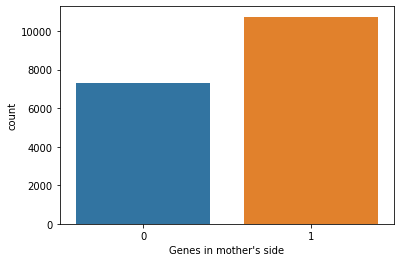

In [ ]:
sns.countplot(x="Genes in mother's side",data=df)

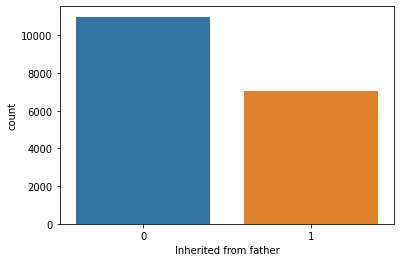

In [ ]:
sns.countplot(x="Inherited from father",data=df)

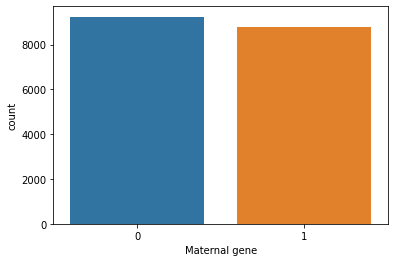

In [ ]:
sns.countplot(x="Maternal gene",data=df)

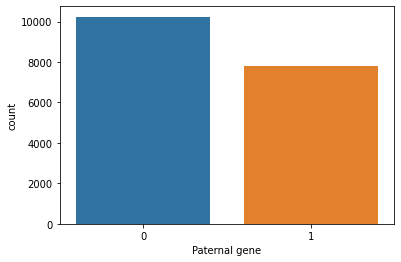

In [ ]:
sns.countplot(x="Paternal gene",data=df)

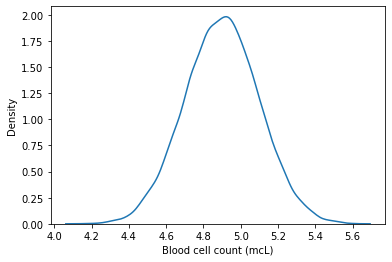

In [ ]:
sns.kdeplot(x='Blood cell count (mcL)',data=df)

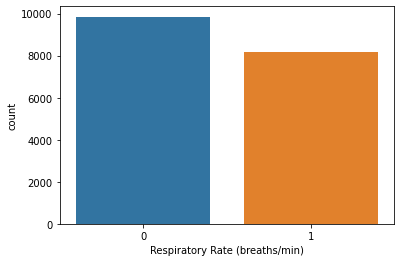

In [ ]:
sns.countplot(x="Respiratory Rate (breaths/min)",data=df)

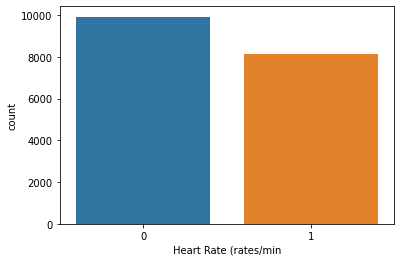

In [ ]:
sns.countplot(x="Heart Rate (rates/min",data=df)

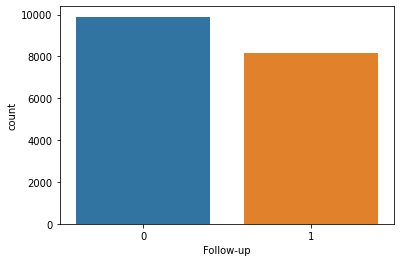

In [ ]:
sns.countplot(x="Follow-up",data=df)

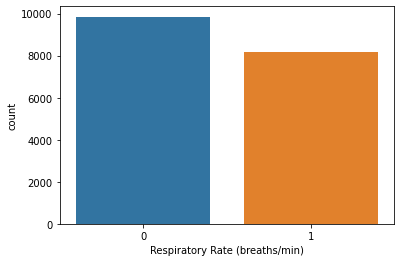

In [ ]:
sns.countplot(x="Respiratory Rate (breaths/min)",data=df)

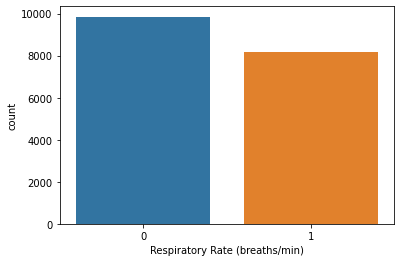

In [ ]:
sns.countplot(x="Respiratory Rate (breaths/min)",data=df)

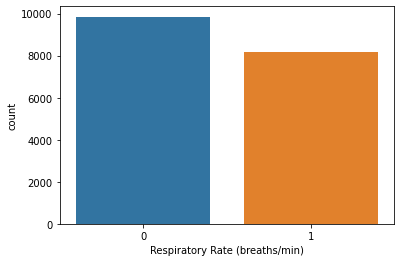

In [ ]:
sns.countplot(x="Respiratory Rate (breaths/min)",data=df)

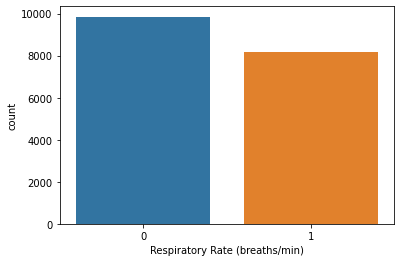

In [ ]:
sns.countplot(x="Respiratory Rate (breaths/min)",data=df)

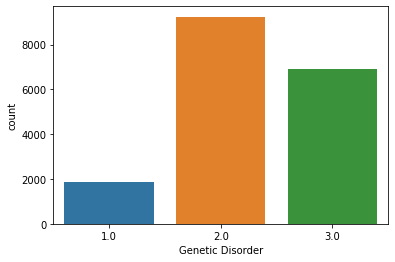

In [ ]:
sns.countplot(x="Genetic Disorder",data=df)

In [ ]:
corr = df.corr()
corr["Genetic Disorder"].sort_values()

Symptom 5                                          -0.149006
Symptom 4                                          -0.131982
Symptom 3                                          -0.118590
Symptom 2                                          -0.107079
Symptom 1                                          -0.079257
Inherited from father                              -0.072869
Genes in mother's side                             -0.068503
Maternal gene                                      -0.055996
Paternal gene                                      -0.048536
Folic acid details (peri-conceptional)             -0.010328
H/O radiation exposure (x-ray)                     -0.003325
Gender_Female                                      -0.003306
Birth asphyxia                                     -0.002687
H/O serious maternal illness                       -0.000750
White Blood cell count (thousand per microliter)    0.000621
H/O substance abuse                                 0.002529
Heart Rate (rates/min   

Class=1, n=10202 (33.333%)
Class=0, n=10202 (33.333%)
Class=2, n=10202 (33.333%)


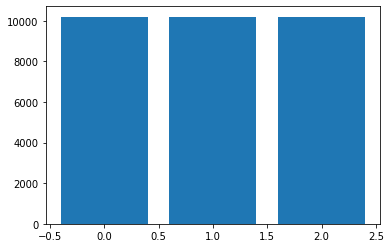

In [ ]:
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
X=df.drop(['Genetic Disorder'],axis=1)
y=df['Genetic Disorder']
y = LabelEncoder().fit_transform(y)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
corr = df.corr()
corr["Genetic Disorder"].sort_values()

Symptom 5                                          -0.149006
Symptom 4                                          -0.131982
Symptom 3                                          -0.118590
Symptom 2                                          -0.107079
Symptom 1                                          -0.079257
Inherited from father                              -0.072869
Genes in mother's side                             -0.068503
Maternal gene                                      -0.055996
Paternal gene                                      -0.048536
Folic acid details (peri-conceptional)             -0.010328
H/O radiation exposure (x-ray)                     -0.003325
Gender_Female                                      -0.003306
Birth asphyxia                                     -0.002687
H/O serious maternal illness                       -0.000750
White Blood cell count (thousand per microliter)    0.000621
H/O substance abuse                                 0.002529
Heart Rate (rates/min   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19937 entries, 0 to 22082
Data columns (total 34 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient Age                                            19937 non-null  float64
 1   Genes in mother's side                                 19937 non-null  int64  
 2   Inherited from father                                  19937 non-null  int64  
 3   Maternal gene                                          19937 non-null  int64  
 4   Paternal gene                                          19937 non-null  int64  
 5   Blood cell count (mcL)                                 19937 non-null  float64
 6   Respiratory Rate (breaths/min)                         19937 non-null  int64  
 7   Heart Rate (rates/min                                  19937 non-null  int64  
 8   Follow-up                                     

In [ ]:
corr = df.corr()
corr["Genetic Disorder"].sort_values()

In [ ]:
X=df.drop(['Genetic Disorder'],axis=1)
y=df['Genetic Disorder']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.10)

ValueError: ignored

In [ ]:
df

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Birth asphyxia,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder


In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler

In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
#joblib.dump(scaler,'scaler')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score,classification_report

models={
    
    'KNN':KNeighborsClassifier(),
    'DT':DecisionTreeClassifier(),
    'RF':RandomForestClassifier()

    
}

In [ ]:
for name,model in  models.items():
    print(f'using {name}: ')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'Training Accuracy :{accuracy_score(y_train,model.predict(x_train))}')
    print(f'Testing Accuracy :{accuracy_score(y_test,y_pred)}')
    print(classification_report(y_test,y_pred))
    print('-'*33)

using KNN: 
Training Accuracy :0.6812816188870152
Testing Accuracy :0.4924137931034483
              precision    recall  f1-score   support

         1.0       0.29      0.31      0.30        74
         2.0       0.53      0.66      0.59       347
         3.0       0.48      0.35      0.41       304

    accuracy                           0.49       725
   macro avg       0.44      0.44      0.43       725
weighted avg       0.49      0.49      0.48       725

---------------------------------
using DT: 
Training Accuracy :1.0
Testing Accuracy :0.52
              precision    recall  f1-score   support

         1.0       0.28      0.27      0.28        74
         2.0       0.58      0.62      0.60       347
         3.0       0.50      0.46      0.48       304

    accuracy                           0.52       725
   macro avg       0.45      0.45      0.45       725
weighted avg       0.52      0.52      0.52       725

---------------------------------
using RF: 
Training Accura

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Birth asphyxia,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Gender_Female,Gender_Male
8,11.0,0,0,1,0,5.209058,1,1,0,1,1,1,0,0,0,1,1,6.669552,1,1.0,1.0,1.0,0.0,1.0,2.0,0,1
9,4.0,0,1,1,1,4.752272,1,1,0,0,1,0,0,0,1,1,1,6.397702,1,0.0,0.0,1.0,1.0,1.0,1.0,0,1
12,1.0,1,1,0,0,4.612265,0,1,1,0,1,0,1,0,1,1,0,7.995115,1,1.0,1.0,0.0,1.0,0.0,2.0,0,1
14,6.0,1,0,1,0,4.620420,1,1,1,0,1,1,1,0,0,0,1,3.000000,1,1.0,0.0,1.0,0.0,1.0,2.0,0,1
18,10.0,1,1,1,0,4.751452,0,1,0,0,0,0,1,0,1,1,0,9.382407,1,1.0,1.0,0.0,0.0,0.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22066,13.0,0,1,0,1,4.777036,0,0,1,0,0,1,0,0,0,1,0,3.000736,0,0.0,0.0,0.0,0.0,1.0,2.0,0,0
22068,4.0,1,0,0,0,5.077554,0,0,0,1,0,1,0,0,0,0,0,9.566549,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0
22076,0.0,1,0,1,0,4.931758,0,1,0,0,0,0,0,0,1,1,0,11.649052,1,1.0,1.0,0.0,1.0,0.0,2.0,1,0
22079,8.0,0,1,0,1,4.974220,0,0,1,0,1,1,0,0,1,0,1,7.041556,0,1.0,1.0,1.0,1.0,0.0,1.0,0,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score,cross_validate
model=RandomForestClassifier(random_state=23)
CV_result=cross_validate(model,X,y,cv=30,n_jobs=-1,return_train_score=True)
CV_result

{'fit_time': array([3.99201059, 3.96351814, 3.93237758, 3.89536023, 3.9151473 ,
        3.87084317, 3.87200403, 3.89175963, 3.88472724, 3.91109514,
        3.87929535, 3.87555122, 3.89102006, 3.93012404, 3.93869638,
        3.96286225, 3.89516735, 3.94001508, 3.89571047, 3.88673282,
        3.88748288, 3.85538077, 3.91147375, 3.89110255, 3.86619997,
        3.92166018, 3.92239237, 3.91226673, 3.8718791 , 3.88356209]),
 'score_time': array([0.05926728, 0.05867147, 0.0611279 , 0.06159854, 0.05709958,
        0.05784011, 0.06409025, 0.06170106, 0.06224656, 0.06028867,
        0.05892777, 0.06957722, 0.06076956, 0.06138277, 0.06432796,
        0.06107903, 0.06057549, 0.0580864 , 0.05826163, 0.06147504,
        0.06183791, 0.06100774, 0.05768037, 0.05774498, 0.0581398 ,
        0.05925155, 0.05817056, 0.05812788, 0.05795217, 0.08148217]),
 'test_score': array([0.58646617, 0.58195489, 0.58345865, 0.61804511, 0.5924812 ,
        0.5924812 , 0.57443609, 0.5924812 , 0.57593985, 0.5924812 ,
    

In [ ]:
CV_result['test_score'].max()

0.6180451127819548

In [ ]:
model=RandomForestClassifier()
import joblib
model.fit(x_train,y_train)
joblib.dump(model, 'model')

['model']

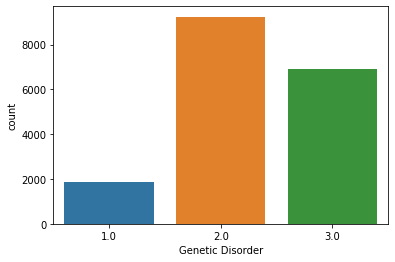

In [ ]:
joblib.dump(scaler,'scaler.h5')